In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


In [8]:
# Load data
df = pd.read_csv("../data/features.csv")

# Separate metadata and features
file_names = df["file_name"]
X = df.drop(columns=["file_name"])


In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: remove near-constant features
X_scaled = VarianceThreshold(threshold=1e-3).fit_transform(X_scaled)

# Fit PCA
pca = PCA(
    n_components=2,
    random_state=42
)

X_pca = pca.fit_transform(X_scaled)

# Explained variance (sanity check)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.28747947 0.20069469]
Total explained variance: 0.4881741668681644


In [10]:
# Fit K-Means
kmeans = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
)

labels = kmeans.fit_predict(X_pca)

# Attach cluster labels
df["cluster"] = labels


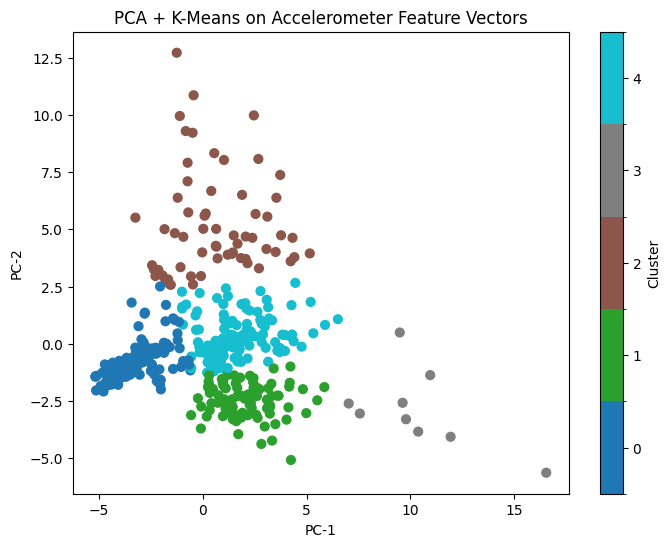

In [11]:
# Visualization
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
label_indices = np.array([label_to_index[l] for l in labels])

cmap = plt.get_cmap("tab10", len(unique_labels))
bounds = np.arange(len(unique_labels) + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=label_indices,
    cmap=cmap,
    norm=norm,
    s=40
)
cbar = plt.colorbar(ticks=np.arange(len(unique_labels)))
cbar.set_ticklabels(unique_labels)
cbar.set_label("Cluster")
plt.title("PCA + K-Means on Accelerometer Feature Vectors")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()


In [ ]:
from pathlib import Path
import os
import shutil

# Load features once (outside loop)
features_csv = Path("../data/features.csv")  # relative to notebook location
features_df = pd.read_csv(features_csv)

# Get unique clusters and get 5 representative samples from each cluster
representative_samples = []
for cluster in np.unique(labels):
    cluster_samples = df[df["cluster"] == cluster]
    representative_samples.append(cluster_samples.sample(n=5, random_state=42))
    print(f"Cluster {cluster}:")
    print(cluster_samples["file_name"].values[:5])
    
    # Merge cluster samples with features_df to get all feature values
    merged_cluster_samples = pd.merge(cluster_samples, features_df, on="file_name", how="left")
    
    # Save merged data to CSV
    output_folder = Path(f"../visuals/rep_samples/PCA-KM/{cluster}")
    if output_folder.exists():
        shutil.rmtree(output_folder)
    output_folder.mkdir(parents=True, exist_ok=True)
    output_file = output_folder / f"cluster_{cluster}.csv"
    merged_cluster_samples.to_csv(output_file, index=False)
    
    # Copy representative sample plots
    for file in cluster_samples["file_name"].values[:5]:
        png_file = file.replace(".csv", ".png")
        src = Path(f"../visuals/boiling_plots/{png_file}")
        dst = output_folder / png_file
        
        # Only copy if source exists
        if src.exists():
            shutil.copy(src, dst)
        else:
            print(f"Warning: {src} not found, skipping")

Cluster 0:
['Boiling_at_Heater_T85_RefVideo1.csv'
 'Boiling_at_Heater_T93_RefVideo2.csv'
 'Boiling_at_Heater_T98_RefVideo3.csv'
 'Calm_to_Boiling_50V_on_StartT80.csv'
 'MATLAB 1-02 PM Mon, Mar 11, 2024 Run4 .csv']
Cluster 1:
['Calm_to_Boiling_50V_on_StartT65.csv'
 'MATLAB 1-14 PM Tue, Sep 10, 2024 Run10 .csv'
 'MATLAB 1-21 PM Thu, Nov 7, 2024 Run10 .csv'
 'MATLAB 1-25 PM Thu, Nov 7, 2024 Run11 .csv'
 'MATLAB 1-29 PM Thu, Nov 7, 2024 Run12 .csv']
Cluster 2:
['MATLAB 1-00 PM Thu, Aug 22, 2024 Run1.csv'
 'MATLAB 1-04 PM Tue, Sep 10, 2024 Run9 .csv'
 'MATLAB 1-22 PM Tue, Sep 10, 2024 Run14 .csv'
 'MATLAB 1-23 PM Tue, Sep 10, 2024 Run15 .csv'
 'MATLAB 1-36 PM Tue, Sep 10, 2024 Run18 .csv']
Cluster 3:
['MATLAB 3-05 PM Fri, Sep 13, 2024 Run7 .csv'
 'MATLAB 3-08 PM Fri, Sep 13, 2024 Run8 .csv'
 'MATLAB 3-13 PM Fri, Aug 23, 2024 Run6 .csv'
 'MATLAB 3-14 PM Fri, Sep 13, 2024 Run9 .csv'
 'MATLAB 3-19 PM Wed, Sep 18, 2024 Run10 .csv']
Cluster 4:
['MATLAB 1-00 PM Fri, Jun 28, 2024 Run8 .csv'
 'MATL